In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [3]:
cases = ['Nextcloud', 'Owncloud', 'Now in Android', 'Eats', 'PCMark']

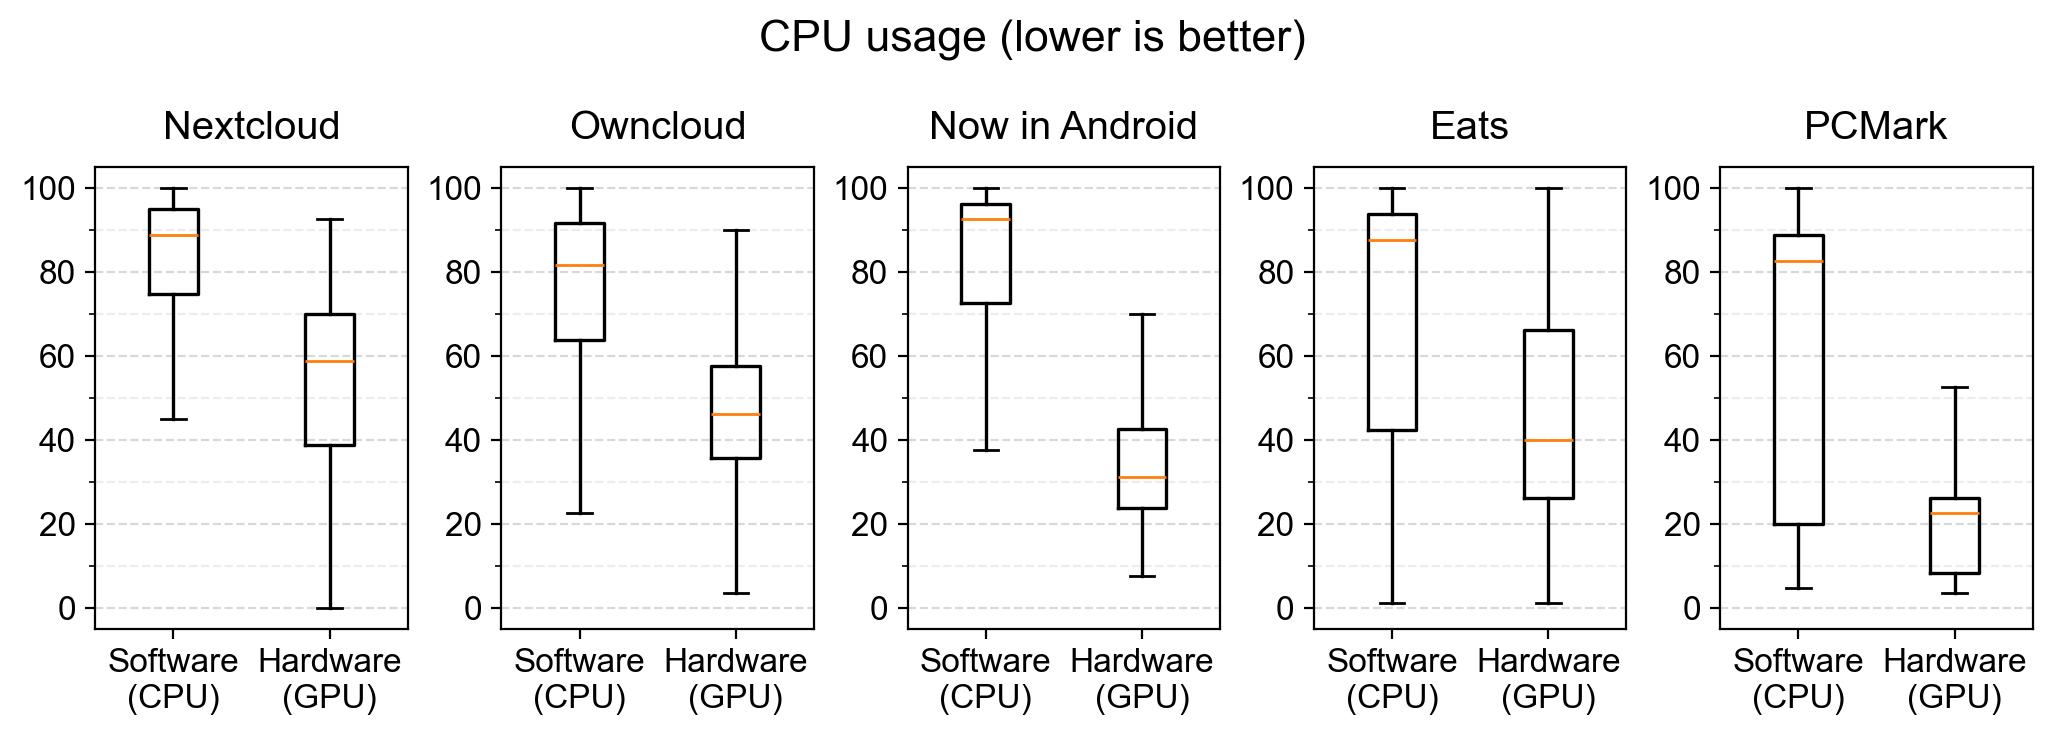

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12.5, 3), dpi=200, sharey=True)
fig.subplots_adjust(hspace=0.35, wspace=0.3)
fig.suptitle('CPU usage (lower is better)', fontsize=16, y=1.125)

ax: plt.Axes
for ax, case in zip(axs.flatten(), cases):
    case_path = case.lower().replace(' ', '')
    df_software = pd.read_csv(f'../data/{case_path}/software/top_filtered.csv')
    df_hardware = pd.read_csv(f'../data/{case_path}/hardware/top_filtered.csv')

    # grid lines
    ax.yaxis.grid(which='major', visible=True, linestyle='--', color='grey', alpha=0.3)
    ax.yaxis.grid(which='minor', visible=True, linestyle='--', color='grey', alpha=0.15)
    ax.yaxis.set_tick_params(which='both', labelbottom=True)

    # box plot
    ax.set_title(case, pad=10)
    ax.boxplot(
        x = [df_software['cpu'] / 4, df_hardware['cpu'] / 4],
        showfliers=False,
        widths=0.3125,
        whiskerprops=dict(linewidth=1.2),
        boxprops=dict(linewidth=1.2),
    )

    # x axis
    labels = ['Software\n(CPU)', 'Hardware\n(GPU)']
    ax.set_xticks(ticks=[1, 2], labels=labels)

    # y axis
    ax.set_yticks(ticks=np.arange(0, 101, 20), minor=False)
    ax.set_yticks(ticks=np.arange(0, 101, 10), minor=True)

plt.show()

In [57]:
reductions: list[float] = []

for case in cases:
    if case == 'PCMark':
        continue

    df_software = pd.read_csv(f'../data/{case.lower().replace(" ", "")}/software/top_filtered.csv')
    df_hardware = pd.read_csv(f'../data/{case.lower().replace(" ", "")}/hardware/top_filtered.csv')
    rel = (df_software['cpu'].median() - df_hardware['cpu'].median()) / 4
    reductions.append(rel)

avg_reduction = np.mean(reductions)
print(f"Average reduction in CPU usage across Nextcloud, Owncloud, NIA and Eats benchmarks: {round(avg_reduction, 2)}%")

Average reduction in CPU usage across Nextcloud, Owncloud, NIA and Eats benchmarks: 43.55%
